In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/student_scores.csv')
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X.head(5)

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

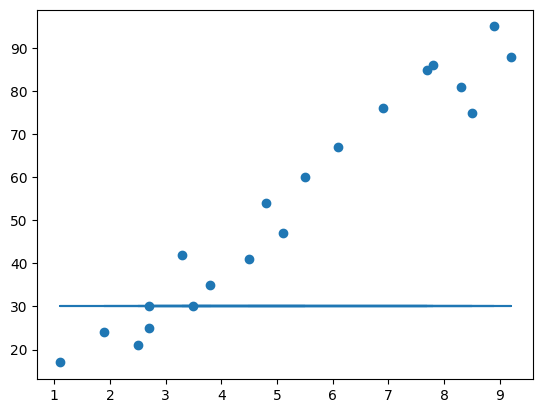

In [12]:
from sklearn.naive_bayes import MultinomialNB
reg1 = MultinomialNB()
reg1.fit(X_train,y_train)
plt.scatter(X_train,y_train)
plt.plot(X_train,reg1.predict(X_train))

In [13]:
reg1.score(X_test,y_test)

0.2

In [42]:
reg1.predict([[4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([30])

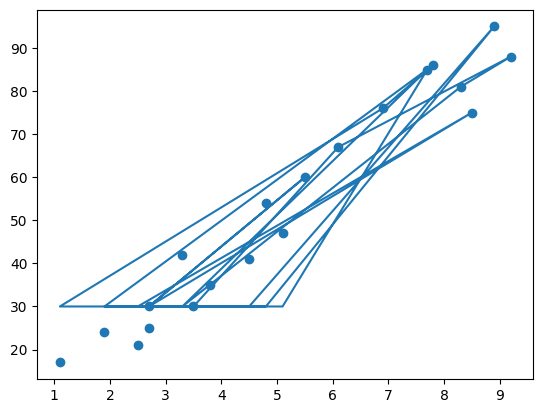

In [15]:
from sklearn.svm import SVC
reg2 = SVC()
reg2.fit(X_train, y_train)
plt.scatter(X_train,y_train)
plt.plot(X_train,reg2.predict(X_train))



In [16]:
reg2.score(X_test,y_test)

0.2

In [17]:
reg2.predict([[2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([30])

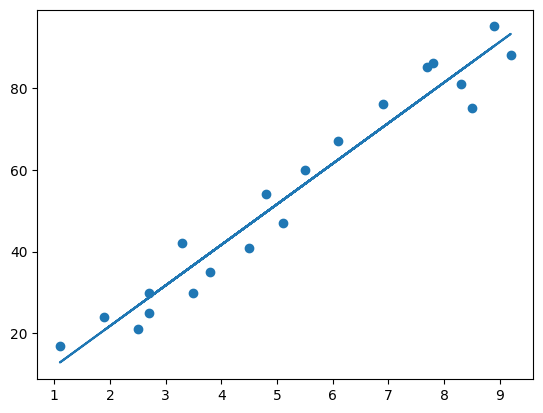

In [18]:
from sklearn.linear_model import LinearRegression
reg3 = LinearRegression()
reg3.fit(X_train,y_train)
plt.scatter(X_train,y_train)
plt.plot(X_train,reg3.predict(X_train))



In [19]:
reg3.score(X_test,y_test)

0.9454906892105354

In [20]:
reg3.predict([[3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([31.75012948])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


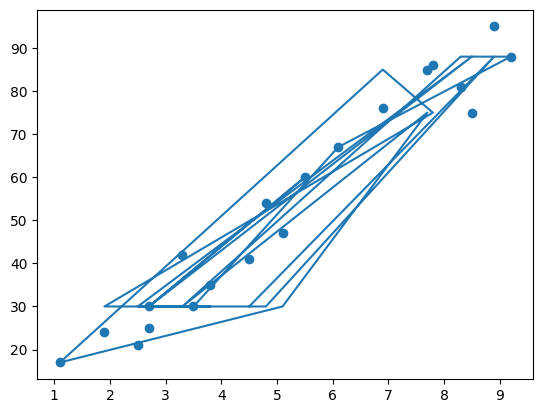

In [21]:
from sklearn.linear_model import LogisticRegression
reg4 = LogisticRegression(random_state=0)
reg4.fit(X_train,y_train)
plt.scatter(X_train,y_train)
plt.plot(X_train,reg4.predict(X_train))



In [22]:
reg4.score(X_test,y_test)

0.2

In [23]:
reg4.predict([[10]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([88])

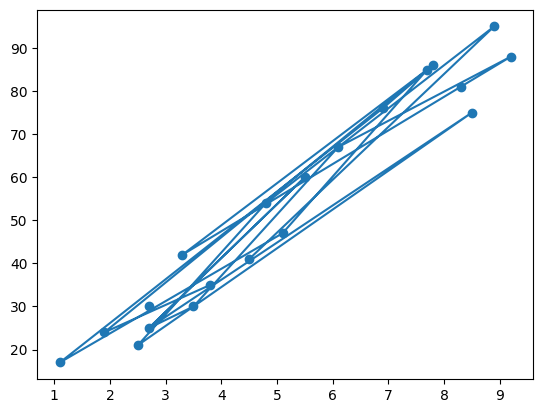

In [24]:
from sklearn.tree import DecisionTreeClassifier
reg5=DecisionTreeClassifier()
reg5.fit(X_train,y_train)
plt.scatter(X_train,y_train)
plt.plot(X_train,reg5.predict(X_train))

In [25]:
reg5.score(X_test,y_test)

0.0

In [26]:
reg5.predict([[10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([88])

In [1]:
# @title K Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [27]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2,
       1, 0, 0], dtype=int32)

In [28]:
df['cluster'] = yp
df.head(10)

,Hours,Scores,cluster
0,2.5,21,1
1,5.1,47,2
2,3.2,27,1
3,8.5,75,0
4,3.5,30,1
5,1.5,20,1
6,9.2,88,0
7,5.5,60,2
8,8.3,81,0
9,2.7,25,1


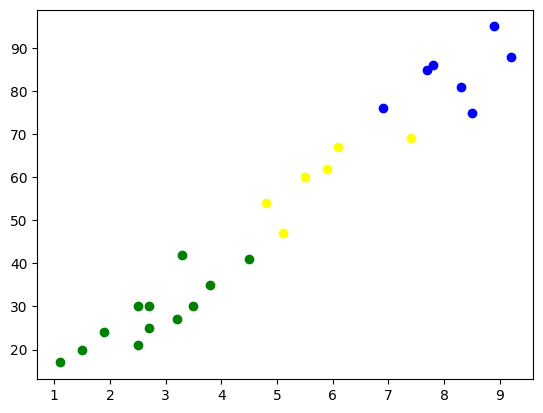

In [30]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Hours'],df1['Scores'],color='blue')
plt.scatter(df2['Hours'],df2['Scores'],color='green')
plt.scatter(df3['Hours'],df3['Scores'],color='yellow')

In [34]:
scaler = MinMaxScaler()

scaler.fit(df[['Hours']])
df['Hours'] = scaler.transform(df[['Hours']])

scaler.fit(df[['Scores']])
df['Scores'] = scaler.transform(df[['Scores']])
df.head()

,Hours,Scores,cluster
0,0.172840,0.051282,1
1,0.493827,0.384615,2
2,0.259259,0.128205,1
3,0.913580,0.743590,0
4,0.296296,0.166667,1


In [36]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Hours','Scores']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1], dtype=int32)

In [37]:
df['cluster']=y_predicted
df.head()

,Hours,Scores,cluster
0,0.172840,0.051282,0
1,0.493827,0.384615,0
2,0.259259,0.128205,0
3,0.913580,0.743590,1
4,0.296296,0.166667,0


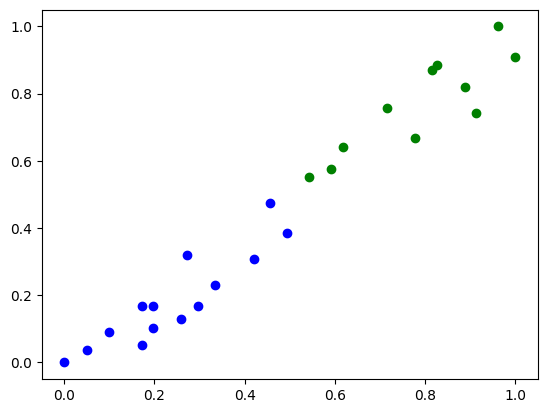

In [38]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Hours'],df1['Scores'],color='blue')
plt.scatter(df2['Hours'],df2['Scores'],color='green')
plt.scatter(df3['Hours'],df3['Scores'],color='yellow')